In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean
from astropy import units as u
from astropy.table import Table, Column
from astropy.table import QTable
from astroquery.simbad import Simbad
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import gala.coordinates as gc
import pandas as pd

#Finding the row of the catalogue that corresponds to a certain HD #
def HDtoRow(HDnum):          
    x = np.where(hd == HDnum)
    row = int(x[0])
    return row

#Finding the distance, proper motion in RA and Dec, radial velocity, and position in RA and Dec from the star's HD #
def HDtoInfo(HDnum):                           
    distance = dist[HDtoRow(HDnum)]            
    properRA = propRA[HDtoRow(HDnum)]
    properDec = propDec[HDtoRow(HDnum)]
    radialVel = radVel[HDtoRow(HDnum)]
    RA = RA_rad[HDtoRow(HDnum)]
    Dec = Dec_rad[HDtoRow(HDnum)]
    info = [distance, properRA, properDec, radialVel, RA, Dec]
    return info

#Finding the absolute magnitude of a star from its HD
def HDtoAbsMag(HDnum):
    abs_mag = absmag[HDtoRow(HDnum)]
    return abs_mag

#Finding the B-V color index from a star's HD
def HDtoBV(HDnum):
    bv = color_index[HDtoRow(HDnum)]
    return bv

#Finding the space velocity of a star. The argument infoArray is the array of information given by the HDtoInfo function
def dataTospaceVel(infoArray):
    distance = infoArray[0]
    properMotion_RA = infoArray[1]
    properMotion_Dec = infoArray[2]
    radVel = infoArray[3]
    RA = infoArray[4]
    Dec = infoArray[5]
    # Original units of proper motion in miliseconds of arc / year. Need to change this to seconds of arc / year
    propMotionRA = properMotion_RA / 1000
    propMotionDec = properMotion_Dec / 1000
    # Convert proper motions to transverse velocities in km/s
    velTrans_RA = propMotionRA * distance * 4.740
    velTrans_Dec = propMotionDec * distance * 4.740
    # Converting velocities to new coordinate system to get dx, dy, dz in km/s
    dx = (radVel * np.cos(Dec) * np.cos(RA)) - (velTrans_RA * np.sin(RA)) - (velTrans_Dec * np.sin(Dec) * np.cos(RA))
    dy = (radVel * np.cos(Dec) * np.sin(RA)) + (velTrans_RA * np.cos(RA)) - (velTrans_Dec * np.sin(Dec) * np.sin(RA))
    dz = (radVel * np.sin(Dec)) + (velTrans_Dec * np.cos(Dec))
    # Converting velocities from km/s to parsec/year
    #dx = dx * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dy = dy * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dz = dz * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    spaceVel = [dx, dy, dz]
    return spaceVel

#Finding a star's cartesian coordinates from its RA and Dec
def radec_to_cartesian(ra_list, dec_list, vel_mag):
    #Read in individual componenets of RA and Dec
    ra_hour = ra_list[0]
    ra_min = ra_list[1]
    ra_sec = ra_list[2]
    dec_deg = dec_list[0]
    dec_arcmin = dec_list[1]
    dec_arcsec = dec_list[2]
    #Convert to degrees
    ra_deg = ra_hour * 15
    ra_arcmin = ra_min * 15
    ra_arcsec = ra_sec * 15
    ra_totdeg = ra_deg + (ra_arcmin/60) + (ra_arcsec/3600)
    dec_totdeg = dec_deg + (dec_arcmin/60) + (dec_arcsec/3600)
    #Convert to radians
    ra_rad = ra_totdeg * (np.pi/180)
    dec_rad = dec_totdeg * (np.pi/180)
    #Find cartesian velocities
    vx = vel_mag * np.cos(dec_rad) * np.cos(ra_rad)
    vy = vel_mag * np.cos(dec_rad) * np.sin(ra_rad)
    vz = vel_mag * np.sin(dec_rad)
    vel_vector = [vx, vy, vz]
    return vel_vector

Star 1: Lambda Ursa Majoris
[-2.3475979602671844, 38.864464643846226, 6.0158794441732875] 

Star 2: R Lyrae
[-2.2261871036624736, 45.17286102812994, 5.711955084322469] 

Star 3: 95 Aquarii
[-7.246084337302554, 18.103551842470473, -1.253726878627938] 

Star 4: 47 Arietis
[-5.9516613501603635, 45.91834674064229, 5.228910029405311] 

Star 5: Kappa Reticuli
[-6.9698543814287, 55.40789219849239, 6.760093054609534] 

Star 6: 20 Psc
[-4.526303458449437, 44.68559218038144, 2.8653912567313133] 



<IPython.core.display.Javascript object>


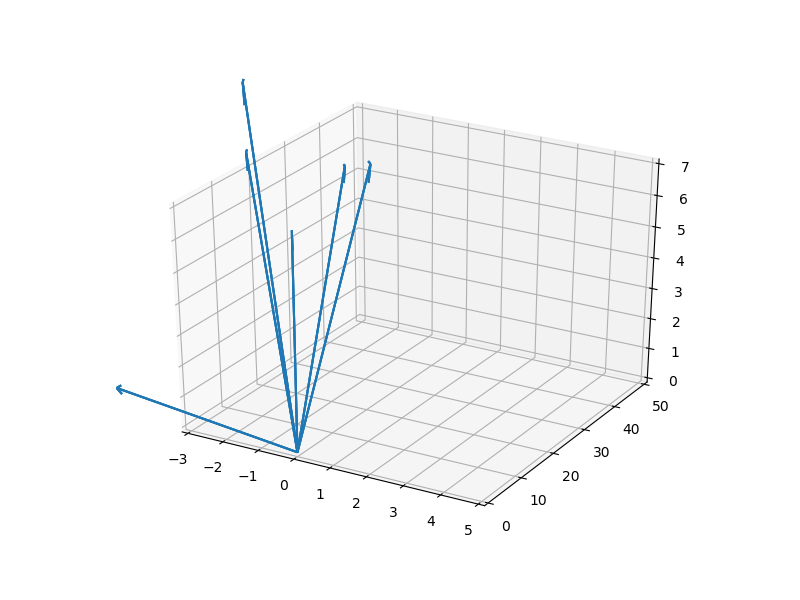

In [2]:
%matplotlib notebook

#Open catalogue data
starInfo = open("hygdata_v3.csv")

#Read in HD number, distance, proper motions, radial velocity, right ascension and declination (in radians)
dist, propRA, propDec, radVel, RA_rad, Dec_rad, xCat, yCat, zCat, vxCat, vyCat, vzCat, absmag = np.loadtxt("hygdata_v3.csv", usecols=(9, 10, 11, 12, 23, 24, 17, 18, 19, 20, 21, 22, 14), delimiter=",", skiprows = 2, unpack=True)
hd, color_index = np.genfromtxt("hygdata_v3.csv", usecols=(2, 16), delimiter=",", skip_header = 2, unpack = True)

# Testing stars in Hyades
print("Star 1: Lambda Ursa Majoris")
print(dataTospaceVel(HDtoInfo(89021)), "\n")
print("Star 2: R Lyrae")
print(dataTospaceVel(HDtoInfo(175865)), "\n")
print("Star 3: 95 Aquarii")
print(dataTospaceVel(HDtoInfo(219832)), "\n")
print("Star 4: 47 Arietis")
print(dataTospaceVel(HDtoInfo(18404)), "\n")
print("Star 5: Kappa Reticuli")
print(dataTospaceVel(HDtoInfo(22001)), "\n")
print("Star 6: 20 Psc")
print(dataTospaceVel(HDtoInfo(223252)), "\n")

test1 = dataTospaceVel(HDtoInfo(89021))
test2 = dataTospaceVel(HDtoInfo(175865))
test3 = dataTospaceVel(HDtoInfo(219832))
test4 = dataTospaceVel(HDtoInfo(18404))
test5 = dataTospaceVel(HDtoInfo(22001))
test6 = dataTospaceVel(HDtoInfo(223252))

origin = [0, 0, 0]
starList = [test1, test2, test3, test4, test5, test6]

fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_xlim([-3, 5])
ax1.set_ylim([0, 50])
ax1.set_zlim([0, 7])

for i in range(len(starList)):
    X, Y, Z = zip(origin, origin, origin)
    U, V, W = zip(starList[i], starList[i], starList[i])
    ax1.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.03)

plt.show()

<IPython.core.display.Javascript object>


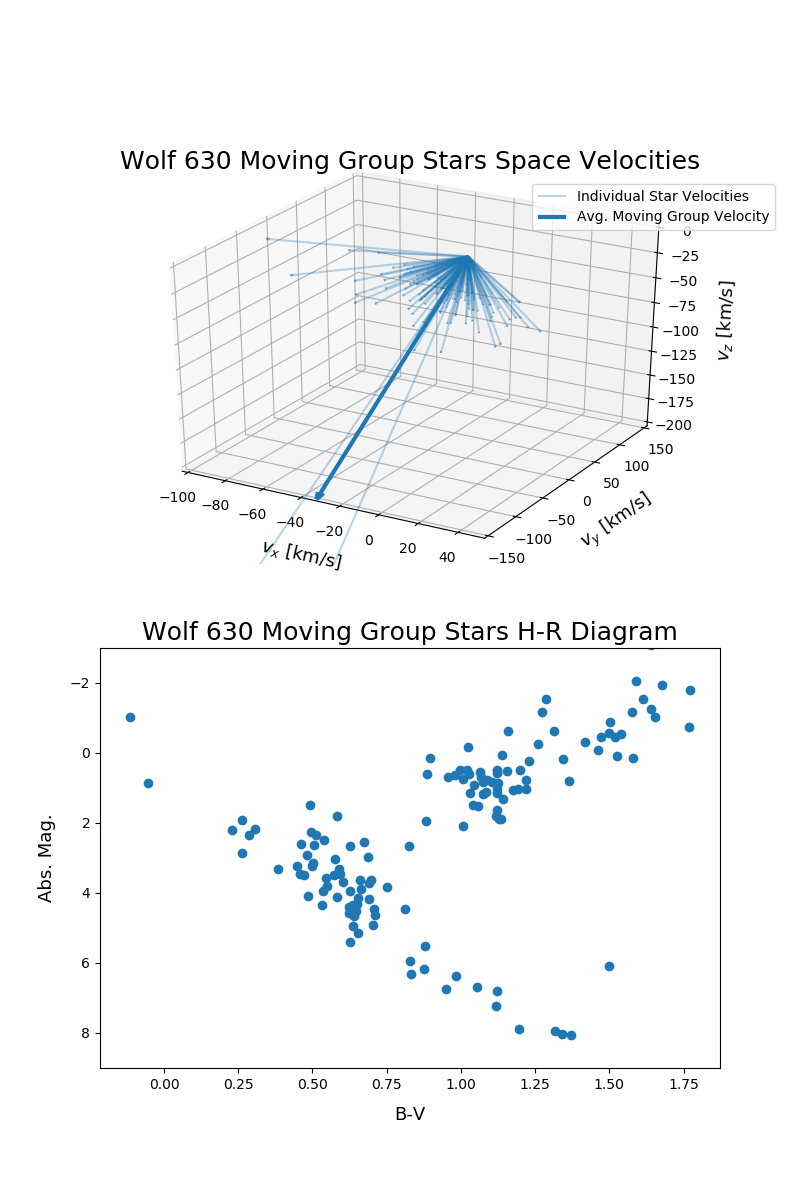

In [3]:
#Open Hyades stars data file
wolf630_Stars = open("Wolf 630 Stars.csv")

#Read in star name and HD number
w_starHD = np.genfromtxt("Wolf 630 Stars.csv", usecols=(0), delimiter=",", skip_header = 1, unpack = True)

origin = [0, 0, 0]
wolf630StarsList = []
wolf630_absmag = []
wolf630_bv = []

#Make a list of the velocities of each Hyades star (array for each star's x, y, and z velocities)
for i in range(0, len(w_starHD)):
    starHD1 = w_starHD[i]
    if np.isnan(starHD1) == True:
        print("true")
        continue
    info = HDtoInfo(starHD1)
    wolf630StarsList.append(dataTospaceVel(info))
    starAbsMag = HDtoAbsMag(starHD1)
    wolf630_absmag.append(starAbsMag)
    starBV = HDtoBV(starHD1)
    wolf630_bv.append(starBV)

#Velocities
U_w = [] #vx
V_w = [] #vy
W_w = [] #vz
#Positions
X_w = []
Y_w = []
Z_w = []

#Make a new list with each star's x velocities, y velocities, and z velocities (U, V, W)
for i in range(len(wolf630StarsList)):
    U_w.append(wolf630StarsList[i][0])
    V_w.append(wolf630StarsList[i][1])
    W_w.append(wolf630StarsList[i][2])
    X_w.append(xCat[i])
    Y_w.append(yCat[i])
    Z_w.append(zCat[i])
    
#Standard deviations for x, y, and z velocities
wolf630VX_stdev = np.std(U_w)
wolf630VY_stdev = np.std(V_w)
wolf630VZ_stdev = np.std(W_w)

#Finding the magnitude of the Hyades cluster vector using the brightest stars in the cluster
brightestHyades = [dataTospaceVel(HDtoInfo(28319)), dataTospaceVel(HDtoInfo(28305)), dataTospaceVel(HDtoInfo(27371)), dataTospaceVel(HDtoInfo(27697)), dataTospaceVel(HDtoInfo(28307)), dataTospaceVel(HDtoInfo(27934)), dataTospaceVel(HDtoInfo(29388)), dataTospaceVel(HDtoInfo(28024)), dataTospaceVel(HDtoInfo(27962)), dataTospaceVel(HDtoInfo(28052))]

brightest_xvals = []
brightest_yvals = []
brightest_zvals = []

for i in range(len(brightestHyades)):
    brightest_xvals.append(brightestHyades[i][0])
    brightest_yvals.append(brightestHyades[i][1])
    brightest_zvals.append(brightestHyades[i][2])
    
avg_brightestx = sum(brightest_xvals)/len(brightest_xvals)
avg_brightesty = sum(brightest_yvals)/len(brightest_yvals)
avg_brightestz = sum(brightest_zvals)/len(brightest_zvals)

tot_velmag = np.sqrt((avg_brightestx**2) + (avg_brightesty**2) + (avg_brightestz**2))

#Getting velocity vector for Hyades cluster
hyadescluster_vector = radec_to_cartesian([6, 18, 5], [7, 29, 0], tot_velmag)

#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,12))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-100, 50])
ax2.set_ylim([-150, 150])
ax2.set_zlim([-200, 0])
ax2.set_title("Wolf 630 Moving Group Stars Space Velocities", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, U_w, V_w, W_w, arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
avgX = mean(U_w)
avgY = mean(V_w)
avgZ = mean(W_w)
ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of Hyades cluster vector
#ax2.quiver(*origin, hyadescluster_vector[0], hyadescluster_vector[1], hyadescluster_vector[2], color='red', arrow_length_ratio=0.07, label="Hyades Cluster Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

ax3 = fig2.add_subplot(212)
ax3.set_ylim([9, -3])
ax3.set_title("Wolf 630 Moving Group Stars H-R Diagram", fontsize = 18)
ax3.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax3.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax3.scatter(wolf630_bv, wolf630_absmag)
plt.show()

In [4]:
#Reading in Gaia info
wolf_gaia = pd.read_csv('Wolf 630 Gaia Info.csv')
wolf_gaia_tab = Table.from_pandas(wolf_gaia)  #Make table from pandas df
wolf_gaia_qtab = QTable(wolf_gaia_tab, units=
                      {'ra': u.degree, 'dec': u.degree, 'parallax': u.marcsec, 'target_radial_velocity': u.km/u.s,
                      'target_pm_ra': u.marcsec/u.yr, 'target_pm_dec': u.marcsec/u.yr, 'target_parallax': u.marcsec})   #Make QTable and give units for columns

plx_to_dist1 = Column(name='dist', data=wolf_gaia_qtab['parallax'].to(u.parsec, equivalencies=u.parallax()))   #Making a new distance (pc) column from parallax data
wolf_gaia_qtab.add_column(plx_to_dist1, index=5)
plx_to_dist2 = Column(name='target_dist', data=wolf_gaia_qtab['target_parallax'].to(u.parsec, equivalencies=u.parallax()))   #Making a new distance (pc) column from target parallax data
wolf_gaia_qtab.add_column(plx_to_dist2, index=6)

wolf = pd.read_csv('Wolf 630 Stars.csv')
wolf_hd = wolf[['hd']]

hyg_db = pd.read_csv('hygdata_v3.csv')
hyg_db = hyg_db[hyg_db['hd'].notna()]  #Drop stars that don't have HD numbers recorded

wolf_info = hyg_db.loc[hyg_db['hd'].isin(wolf_hd['hd'])]  #Get info for Hyades stars
wolf_tab = Table.from_pandas(wolf_info)
wolf_qtab = QTable(wolf_tab, units={'vx': u.pc/u.yr, 'vy': u.pc/u.yr, 'vz': u.pc/u.yr})
wolf_qtab['vx'] = wolf_qtab['vx'].to(u.km/u.s)   #Converting velocities from pc/yr to km/s
wolf_qtab['vy'] = wolf_qtab['vy'].to(u.km/u.s)
wolf_qtab['vz'] = wolf_qtab['vz'].to(u.km/u.s)

wolf_pos = wolf_qtab['ra', 'dec']
wolf_pos = wolf_pos.to_pandas()

print(wolf_gaia_qtab)

source_id         ra         ... target_radial_velocity    target_distance    
                 deg         ...         km / s                               
--------- ------------------ ... ---------------------- ----------------------
 2.37e+18        3.659946156 ...                  -22.5               2.36e-06
 2.75e+18        7.083700099 ...                  -8.62               2.51e-07
 2.38e+18        11.04745822 ...                   -0.1               3.06e-06
 2.55e+18        11.27016921 ...                  9.498               8.39e-08
 2.38e+18        11.36937777 ...                 -10.35               4.82e-08
 2.55e+18        12.82645277 ...                   4.41               1.53e-05
 2.47e+18        13.92663309 ...                    1.9               2.58e-08
 4.26e+17        14.16546805 ...                -47.941 1.8399999999999998e-07
 5.03e+18        16.10046051 ...                   5.87               4.96e-08
 2.55e+18        16.45526785 ...                  -7

<IPython.core.display.Javascript object>


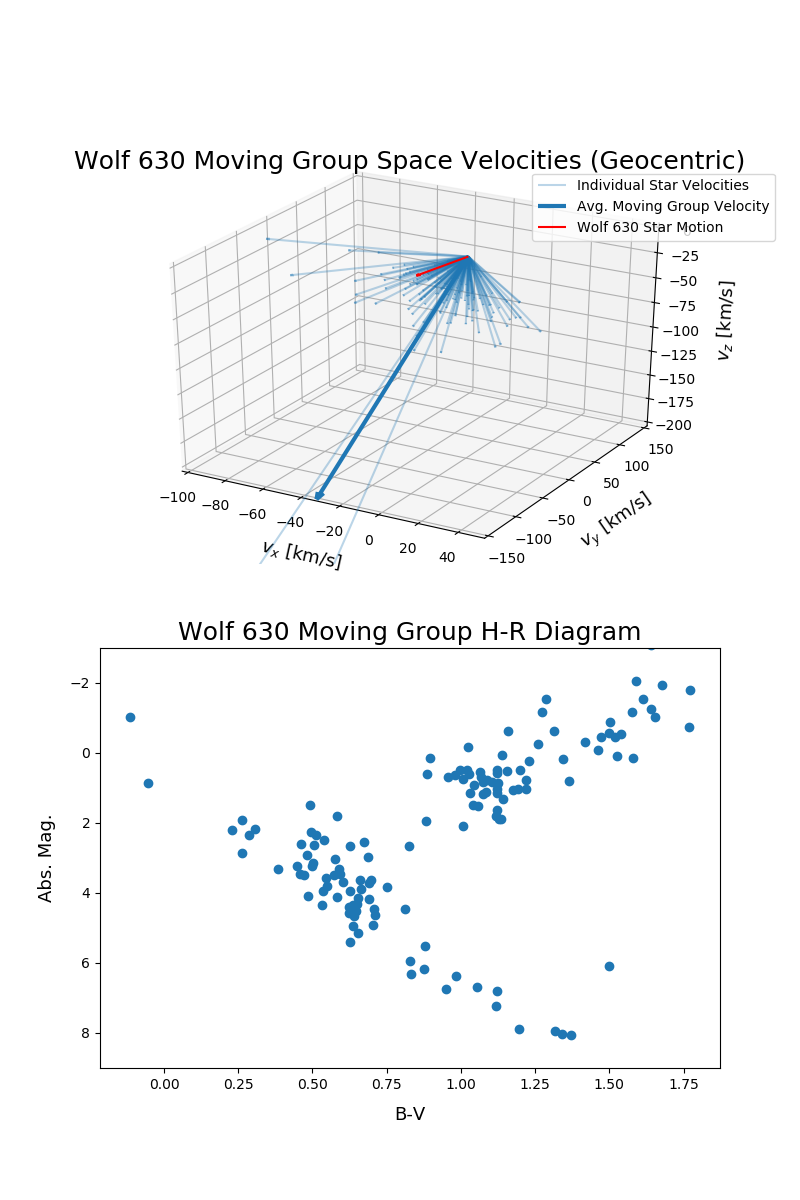

In [5]:
#Getting velocity vector for Hyades cluster
wolf_vector = dataTospaceVel(HDtoInfo(152751)) 

#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,12))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-100, 50])
ax2.set_ylim([-150, 150])
ax2.set_zlim([-200, 0])
ax2.set_title("Wolf 630 Moving Group Space Velocities (Geocentric)", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, wolf_qtab['vx'], wolf_qtab['vy'], wolf_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
avgX = mean(U_w)
avgY = mean(V_w)
avgZ = mean(W_w)
ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of Hyades cluster vector
ax2.quiver(*origin, wolf_vector[0], wolf_vector[1], wolf_vector[2], color='red', arrow_length_ratio=0.07, label="Wolf 630 Star Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

ax3 = fig2.add_subplot(212)
ax3.set_ylim([9, -3])
ax3.set_title("Wolf 630 Moving Group H-R Diagram", fontsize = 18)
ax3.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax3.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax3.scatter(wolf630_bv, wolf630_absmag)
plt.show()

<IPython.core.display.Javascript object>


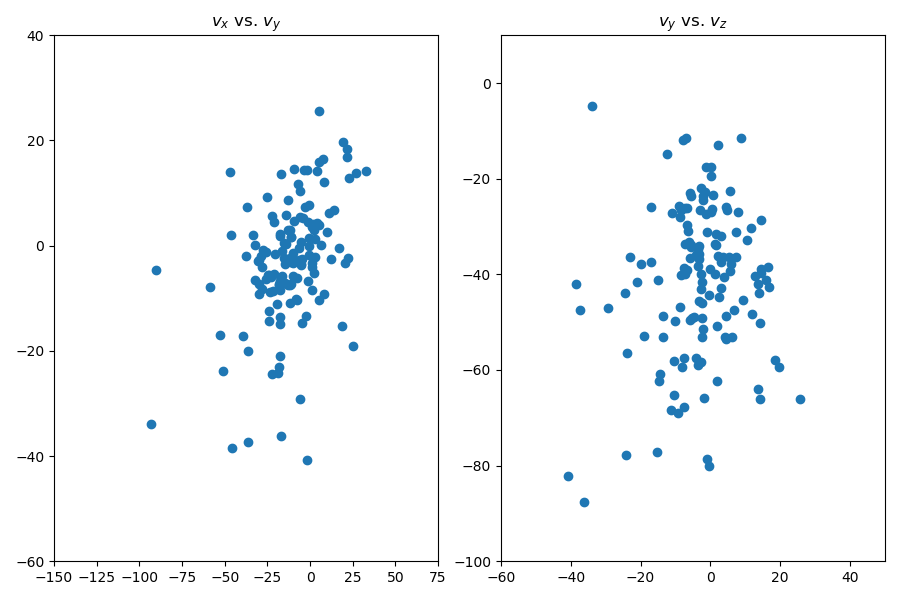

In [6]:
fig = plt.figure(figsize=(9,6))

ax1 = fig.add_subplot(121)
ax1.set_xlim([-150,75])
ax1.set_ylim([-60, 40])
ax1.set_title("$v_x$ vs. $v_y$")
ax1.scatter(wolf_qtab['vx'], wolf_qtab['vy'])

ax2 = fig.add_subplot(122)
ax2.set_xlim([-60, 50])
ax2.set_ylim([-100, 10])
ax2.set_title("$v_y$ vs. $v_z$")
ax2.scatter(wolf_qtab['vy'], wolf_qtab['vz'])

plt.tight_layout()

In [7]:
wolf_pos_comb = wolf_pos['ra'].astype(str) + str(' ') + wolf_pos['dec'].astype(str)
wolf_names = str('hd ') + wolf_info['hd'].astype(str)
wolf_names.to_csv('Wolf 630 Names.csv')

/Users/eve.charest/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


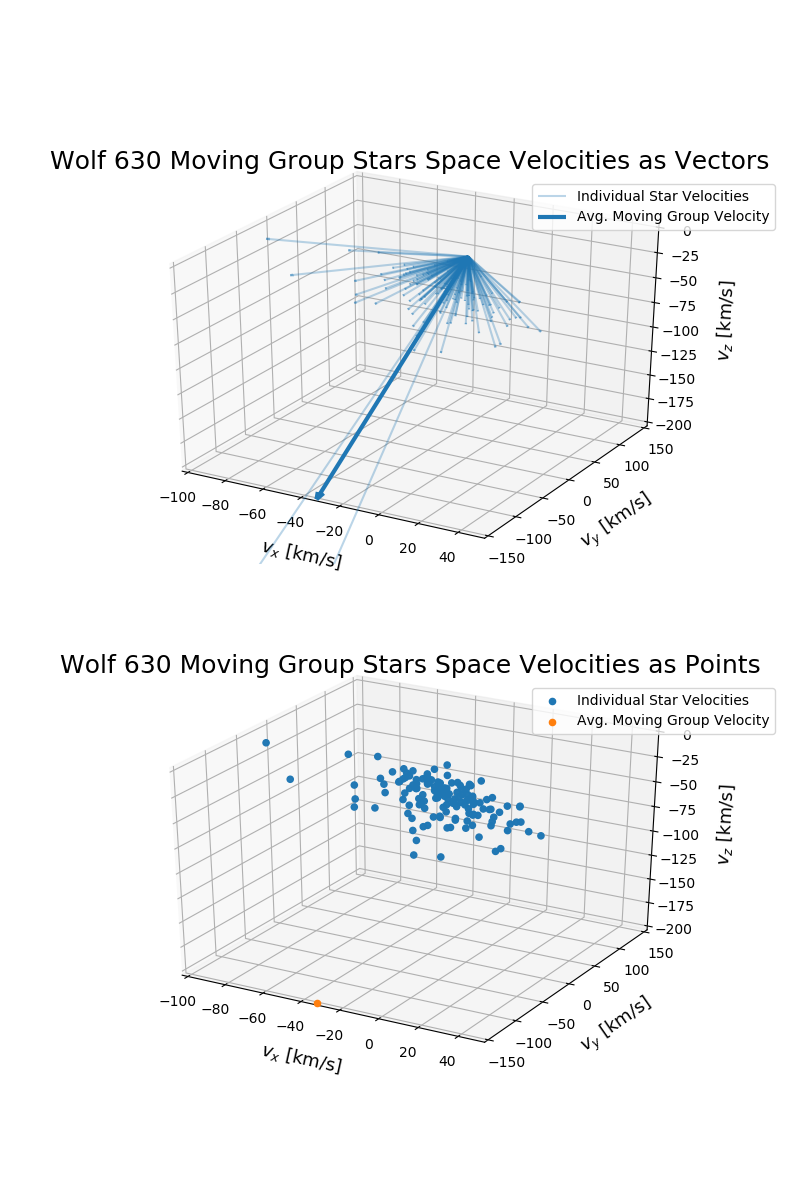

In [7]:
#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,12))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-100, 50])
ax2.set_ylim([-150, 150])
ax2.set_zlim([-200, 0])
ax2.set_title("Wolf 630 Moving Group Stars Space Velocities as Vectors", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, wolf_qtab['vx'], wolf_qtab['vy'], wolf_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
avgX = mean(U_w)
avgY = mean(V_w)
avgZ = mean(W_w)
ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of Hyades cluster vector
#ax2.quiver(*origin, hyadescluster_vector[0], hyadescluster_vector[1], hyadescluster_vector[2], color='red', arrow_length_ratio=0.07, label="Hyades Cluster Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

ax3 = fig2.add_subplot(212, projection='3d')
ax3.set_title("Wolf 630 Moving Group Stars Space Velocities as Points", fontsize = 18)
ax3.scatter(wolf_qtab['vx'], wolf_qtab['vy'], wolf_qtab['vz'], label="Individual Star Velocities")
#ax3.scatter(hyadescluster_vector[0], hyadescluster_vector[1], hyadescluster_vector[2], color='red', label="Hyades Cluster Velocity")
ax3.scatter(avgX, avgY, avgZ, label="Avg. Moving Group Velocity")
ax3.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_xlim([-100, 50])
ax3.set_ylim([-150, 150])
ax3.set_zlim([-200, 0])
ax3.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

plt.show()

In [6]:
print(wolf_gaia_qtab['ra', 'dec', 'dist', 'target_dist'])

        ra                 dec                dist           target_dist    
       deg                 deg                 pc                 pc        
------------------ ------------------- ------------------ ------------------
       3.659946156         -18.9331898 141.24829479443903  137.1742112482853
       7.083700099          10.1890041  38.09152924275196  38.04378840044891
       11.04745822        -10.61005381  66.10902789334048  71.63323782234956
       11.27016921  1.7829751169999999 22.391340534179466 22.431382401234625
       11.36937777        -12.88172209  32.38188441238628  32.45404507217779
       12.82645277         3.384722402  149.6545752933794  137.9310344827586
       13.92663309        -7.347347105  178.7180256701729  179.3915040183697
       14.16546805         59.18085527 60.072712383519814  57.84526391901662
       16.10046051        -25.60641539  26.98111743791004 27.011769027765396
       16.45526785         4.907816163 44.376204866381514 45.058846853991305

In [6]:
c = SkyCoord(ra=wolf_gaia_qtab['ra'], dec=wolf_gaia_qtab['dec'], radial_velocity=wolf_gaia_qtab['target_radial_velocity'], 
            distance=wolf_gaia_qtab['dist'], pm_ra_cosdec=wolf_gaia_qtab['target_pm_ra'], pm_dec=wolf_gaia_qtab['target_pm_dec'],
            frame='icrs')
pm = [wolf_gaia_qtab['target_pm_ra'], wolf_gaia_qtab['target_pm_dec']]
c = c.transform_to(coord.Galactocentric)  #Transform from spherical coordinates (RA, Dec, PM) to galactocentric
print(c)

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8114.91912338,  2.78535863e+01, -1.17494961e+02),
     (-8131.39043511,  2.13599624e+01, -9.30042221e+00),
     (-8130.62126786,  1.68805604e+01, -4.25298038e+01),
     (-8127.38539405,  9.41995113e+00,  1.22076086e+00),
     (-8125.69432572,  7.13074872e+00, -1.05670738e+01),
     (-8163.53934385,  6.38222344e+01, -1.08023460e+02),
     (-8158.04753416,  4.89578802e+01, -1.47253304e+02),
     (-8155.16018534,  4.99311056e+01,  1.70250169e+01),
     (-8123.57675922, -1.61250884e-01, -6.13295058e+00),
     (-8137.17225181,  1.82163638e+01, -1.67020736e+01),
     (-8137.07988626,  1.80949175e+01, -1.64582125e+01),
     (-8131.6811731 ,  1.24791329e+01,  7.68495446e+00),
     (-8132.65494091, -8.10062640e-02, -6.02139614e+01),
     (-8136.79100624, -2.84366972e+01, -2

<IPython.core.display.Javascript object>


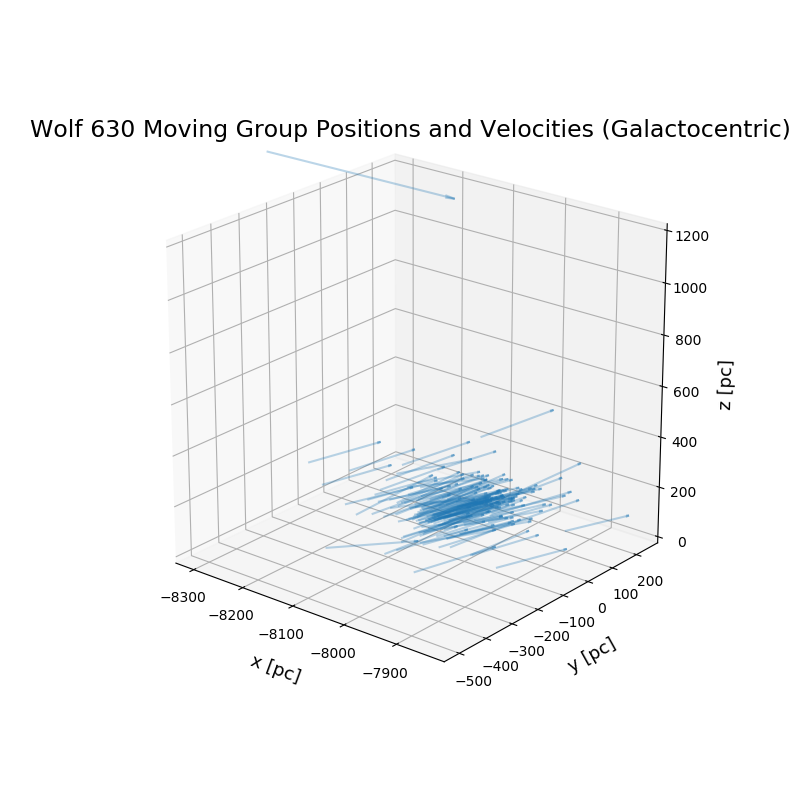

In [11]:
#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111, projection='3d')
#ax2.set_xlim([-9000, -7000])
#ax2.set_ylim([0, 250])
ax2.set_zlim([0, 1200])
ax2.set_title("Wolf 630 Moving Group Positions and Velocities (Galactocentric)", fontsize = 17)
ax2.set_xlabel("x [pc]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("y [pc]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("z [pc]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(c.x, c.y, c.z, c.v_x, c.v_y, c.v_z, arrow_length_ratio=0.05, label="Individual Star Velocities", alpha = 0.3);

In [18]:
print(max(c.v_z))
print(min(c.v_z),"\n")
print(max(c.v_y))
print(min(c.v_y),"\n")
print(max(c.v_x))
print(min(c.v_x),"\n")

93.8786476830618 km / s
-51.48433498737411 km / s 

234.5961030388871 km / s
23.324555477580926 km / s 

332.0074165075787 km / s
11.438961258471112 km / s 



<IPython.core.display.Javascript object>


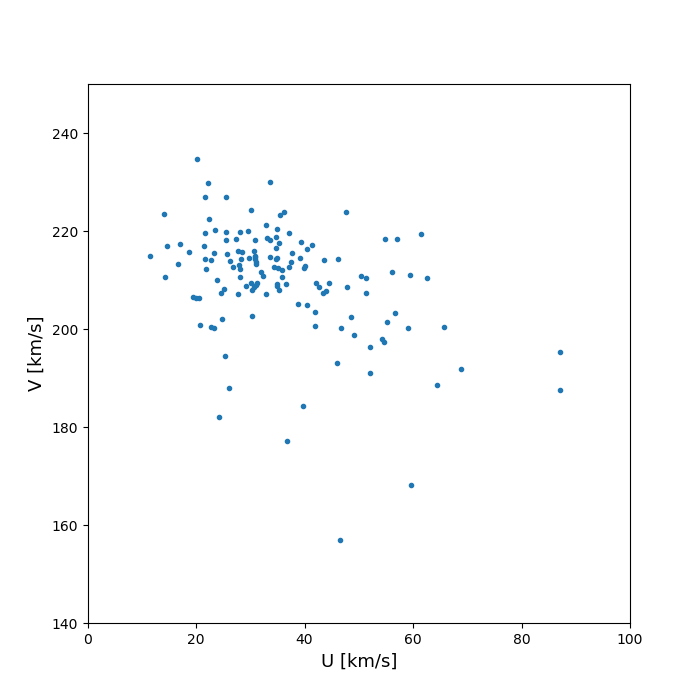

In [6]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(c.v_x, c.v_y, marker='.')
ax.set_xlim([0, 100])
ax.set_ylim([140, 250])
ax.set_xlabel("U [km/s]", fontsize=13)
ax.set_ylabel("V [km/s]", fontsize=13);